In [36]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
# %matplotlib inline

## Loss function: y(x) = sin(x) / x

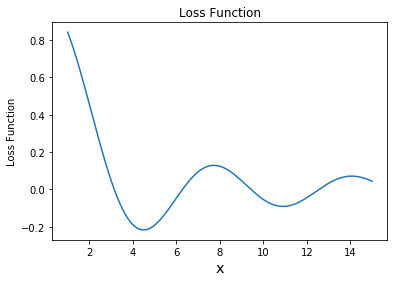

In [37]:
x = np.linspace(1, 15, 100000)
y = np.sin(x) / x
plt.plot(x, y)
plt.xlabel("x", fontsize = 'x-large')
plt.ylabel("Loss Function")
plt.title("Loss Function");

In [46]:
def find_min(origin = 7):
    #origin = float(input("起始值："))
    # 該點斜率(約略值)
    origin_right = origin + 0.001
    origin_left = origin - 0.001
    origin_diff = origin_right - origin_left
    y_diff = np.sin(origin_right) / origin_right - np.sin(origin_left) / origin_left
    slope = y_diff / origin_diff
    # 底圖
    x = np.linspace(1, 15, 100000)
    y = np.sin(x) / x
    plt.figure(figsize = (15, 7))
    plt.plot(x, y)
    plt.scatter(origin, np.sin(origin) / origin, s = 200)
    
    learning_rate = 0.01 * abs(slope) # 讓斜率愈接近0時learning rate愈小，以防超過
    n = 0
    plot_x = []
    plot_y = []
    while abs(slope) > 0.001: # 如果斜率還不夠小，就要繼續找下去
        if slope < 0:
            origin += learning_rate
        else:
            origin -= learning_rate
        origin_right = origin + 0.001
        origin_left = origin - 0.001
        origin_diff = origin_right - origin_left
        y_diff = np.sin(origin_right) / origin_right - np.sin(origin_left) / origin_left
        slope = y_diff / origin_diff
        n += 1
        if n % 200 == 0:
            plot_x.append(origin)
            plot_y.append(np.sin(origin) / origin)
    plt.scatter(plot_x, plot_y, s = 60, c = np.arange(len(plot_x)), cmap = "viridis")
    plt.xlabel("x", fontsize = 'x-large')
    plt.ylabel("Loss Function", fontsize = 'x-large')
    plt.title("Loss Function", fontsize = 'xx-large')

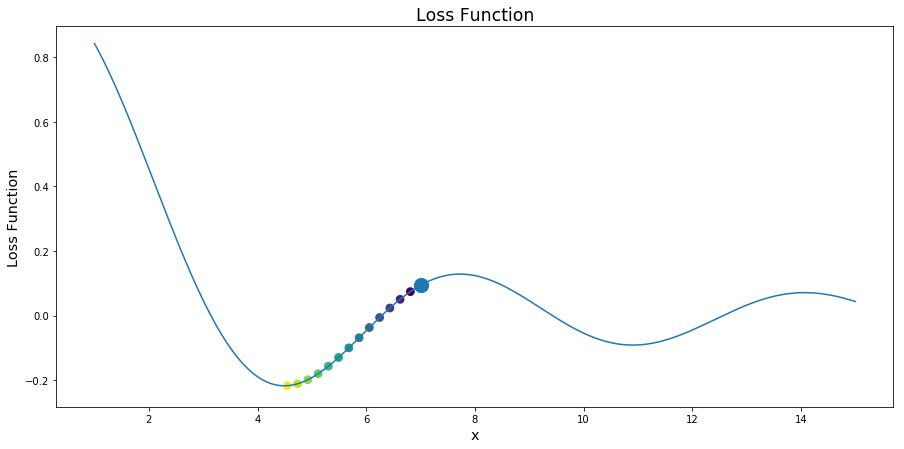

In [47]:
find_min(7)

## 以互動式滑桿來看不同起始值的變化(在nbviewer上有時似乎不能順利顯示)

In [48]:
interact(find_min);

interactive(children=(IntSlider(value=7, description='origin', max=21, min=-7), Output()), _dom_classes=('widget-interact',))